In [1]:
import pandas as pd 
import numpy as np

In [64]:
df = pd.read_csv('simplemaps_worldcities_basicv1.74/worldcities.csv')

In [67]:
df.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,lat_n,lng_n,cluster
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764,0.203355,2.093111,13
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077,-1.579435,1.615398,1
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604,-0.095718,1.184690,9
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629,-0.508113,1.120746,9
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140,-0.693892,1.821018,1


In [65]:
import pandas as pd
import plotnine as p9
import random

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

def normalize(series):
    return (series - series.mean()) / series.std()

df['lat_n'] = normalize(df['lat']) 
df['lng_n'] = normalize(df['lng'])

pts = [np.array(pt) for pt in zip(df['lat_n'], df['lng_n'])] 

In [75]:
pts[0]

array([0.2033555 , 2.09311148])

In [55]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
def plot(k,i):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

    lats = df['lat'].values
    lngs = df['lng'].values
    clsts = df['cluster'].values
    ax.coastlines()
    plt.title(f'k={k} times n={i+1}')
    ax.scatter(lngs, lats, s=.1,c=clsts, transform=ccrs.PlateCarree())
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
    plt.show()

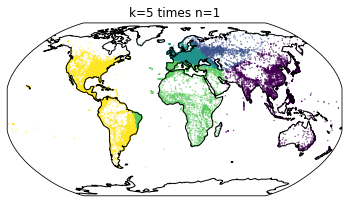

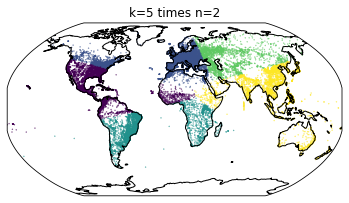

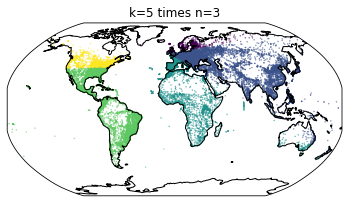

time cost: 1.265010913213094s


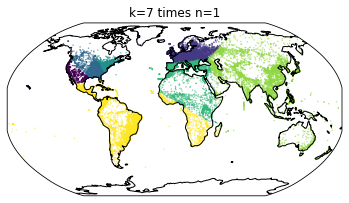

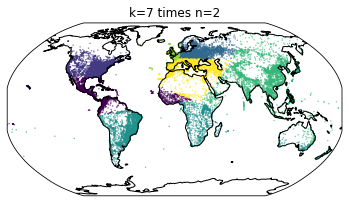

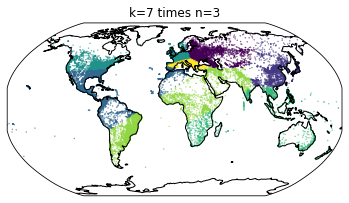

time cost: 1.6016577084859211s


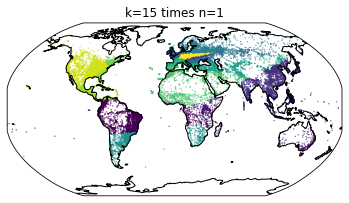

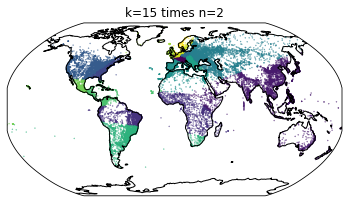

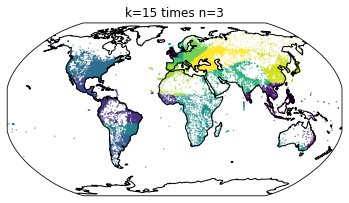

time cost: 3.0477824211120605s


In [66]:
import time
for k in [5,7,15]:
    ts = []
    for j in range(3):
        t  = time.time()
        centers = random.sample(pts, k)
        old_cluster_ids, cluster_ids = None, [] # arbitrary but different
        while cluster_ids != old_cluster_ids:
            old_cluster_ids = list(cluster_ids)
            cluster_ids = []
            for pt in pts:
                min_cluster = -1
                min_dist = float('inf')
                for i, center in enumerate(centers):
                    dist = haversine(pt[1], pt[0], center[1], center[0])
                    if dist < min_dist:
                        min_cluster = i
                        min_dist = dist
                cluster_ids.append(min_cluster)
        df['cluster'] = cluster_ids
        cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]for match in range(k)]
        centers = [sum(pts)/len(pts) for pts in cluster_pts]
        ts.append(time.time()-t)
        plot(k, j)
        
    print(f'time cost: {np.average(ts)}s')
